# Assignment 3

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


In [4]:
import os
import os.path
import pandas as pd

files = [os.path.join("fruit", fname) for fname in os.listdir("fruit")]
            
#creates a bunch of freshes
def extract_fresh(f, type):
    x = pd.read_excel(f)
    if x.iloc[2,0] == "Fresh1":
        fresh = x.iloc[2]
        fresh = fresh.drop(fresh.index[[2,5]]) 
        fresh['7'] = fresh.index[[0]]
        fresh['8'] = type
        return fresh
    else:
        return []

#Puts freshes into an array
all_rows = []
    
for i in xrange(1, 28):
    fresh_row = extract_fresh(files[i], "Fruit")
    
    if len(fresh_row) > 0:
        all_rows.append([extract_fresh(files[i], "Fruit")[n] for n in range(7)])

for i in range(21):
    if i == 16:
        continue
    else:
        r = all_rows[i][5][0].split(u"—")[0]
        all_rows[i][5] = r
        

    #Converts array to pandas data frame
fruit = pd.DataFrame(data=all_rows, columns=("form","price_per_lb", "yeild", "lb_per_cup", "price_per_cup", "food", "type"))
fruit = fruit.fillna("Pineapple")
fruit.iloc[16,6] = "Fruit"

extract_fresh(files[2], "Fruit")


Apricots—Average retail price per pound and per cup equivalent, 2013                                               Fresh1
Unnamed: 1                                                                                                        3.04007
Unnamed: 3                                                                                                           0.93
Unnamed: 4                                                                                                       0.363763
Unnamed: 6                                                                                                         1.1891
7                                                                       Index([u'Apricots—Average retail price per p...
8                                                                                                                   Fruit
Name: 2, dtype: object

__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

<strong style="color:#B0B"> It does not produce the right price for tomatoes because there are different categories of "Fresh" in which tomatoes come. There are cherry, roma, and beefsteak tomatoes under the fresh cateogry, and my code is not set up to get any rows other than the one labeled "Fresh1" </strong>

In [5]:
files = [os.path.join("vegetables", fname) for fname in os.listdir("vegetables")]

all_rows = []
    
for i in xrange(0, 44):
    fresh_row = extract_fresh(files[i], "Vegetable")
    
    if len(fresh_row) > 0:
        all_rows.append([extract_fresh(files[i], "Vegetable")[n] for n in range(7)])
        
for i in range(26):
    r = all_rows[i][5][0].split(u"—")[0]
    all_rows[i][5] = r


#Converts array to pandas data frame
veg = pd.DataFrame(data=all_rows, columns=("form","price_per_lb", "yeild", "lb_per_cup", "price_per_cup", "food", "type"))
veg

,form,price_per_lb,yeild,lb_per_cup,price_per_cup,food,type
0,Fresh1,1.17225,0.458554,0.451948,1.155360,Acorn squash,Vegetable
1,Fresh1,2.21305,0.375309,0.385809,2.274967,Artichoke,Vegetable
2,Fresh1,3.21349,0.493835,0.396832,2.582272,Asparagus,Vegetable
3,Fresh1,2.23587,0.740753,0.31967,0.964886,Avocados,Vegetable
4,Fresh1,2.76355,1.06,0.341717,0.890898,Brussels sprouts,Vegetable
5,Fresh1,1.24474,0.714,0.451948,0.787893,Butternut squash,Vegetable
6,Fresh1,,,,NaN,Cauliflower,Vegetable
7,Fresh1,NaN,NaN,NaN,NaN,Celery,Vegetable
8,Fresh1,2.63084,1.16,0.286601,0.650001,Collard greens,Vegetable
9,Fresh1,2.69062,0.54,0.363763,1.812497,Sweet corn,Vegetable


__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [18]:
veg = veg.fillna(0)
veg = veg[veg.price_per_cup != 0.0]
veg

frames = [veg, fruit]
all_produce 

writer = pd.ExcelWriter('produce_prices.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
all_produce.to_excel(writer, sheet_name='Sheet1')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

<ol>
<li>The bar graph below is a good way to show which fruits are the most and least expensive. We can see right away that raspberries are the most expensive, at almost 7 per pound. Blueberries are next at nearly 5 per pound. It is well known that berries are quite expensive, so I am not surprised that berries occupy the top positions. The cheapest fruits are bananas, cantaloupe, honeydew melon, and pineapple.</li>

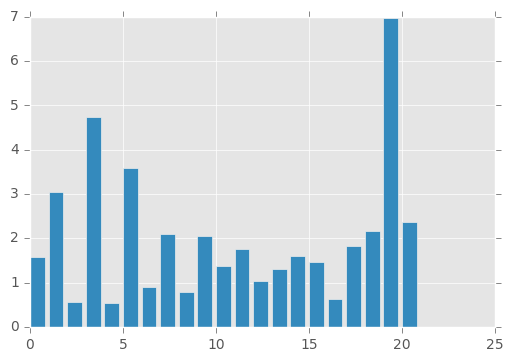

In [79]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

frt_lb = fruit[['food', 'price_per_lb']]

plt.bar(range(len(frt_lb)), frt_lb['price_per_lb'])
plt.show()

<li> 2. These overlapping histograms show that fruit and vegetable price distributions are fairly similar. The fruit distribution looks significantly left-skewed, while the vegetable looks more centered. For this sample, it looks like vegetable prices are centered slightly right of fruit prices, around 2.2 rather than 1.6. Therefore, it may be that vegetables here tend to be slightly more expensive overall. However, fruit has some major outliers to the right, which, I'm guessing, come from the berries. </li>

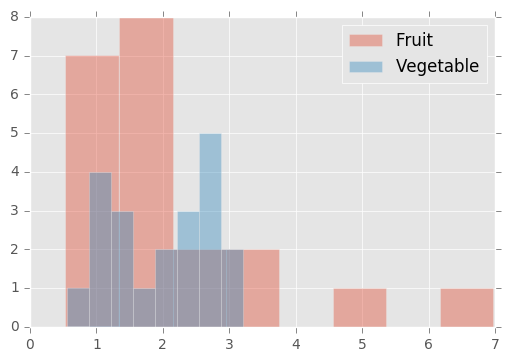

In [30]:
plt.hist(all_produce[all_produce['type'] == "Fruit"]['price_per_lb'].dropna(),bins=8, alpha=.4,label='Fruit')
plt.hist(all_produce[all_produce['type'] == "Vegetable"]['price_per_lb'].dropna(),bins=8,alpha=.4,label='Vegetable')
plt.legend()
plt.show()

<li> 3. I interpreted best value to be a function of the price per pound, price per cup, and the yeild. Therefore, I scattered price per pound and yeild for both fruits and vegetables. I included price per cup as the size of each point. The produce with the best value for the price would be the ones with high yeild and low price per pound and cup. The first plot shows fruits and vegetables together, and the second two show them individually with labeled points. We can see that the high value fruits are bananas, oranges, melons, pineapple, and papaya. For vegetables, we the best deal comes from potatoes, raddishes, lettuce, and some squashes. We also see that overall, vegetables seem to yeild slightly less, but also cost slightly less than fruits. Also, we see a solid grouping of fruit with high yeild but very high price. Price per cup and per pound seem mostly correlated as we would expect. </li>

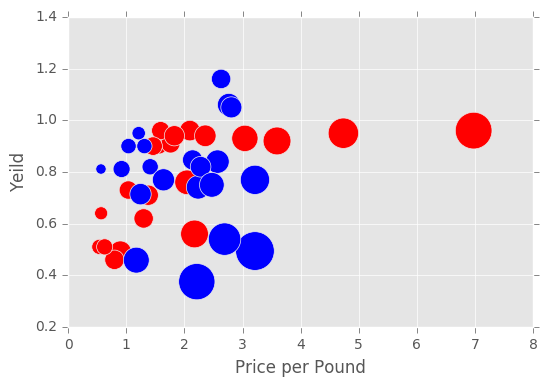

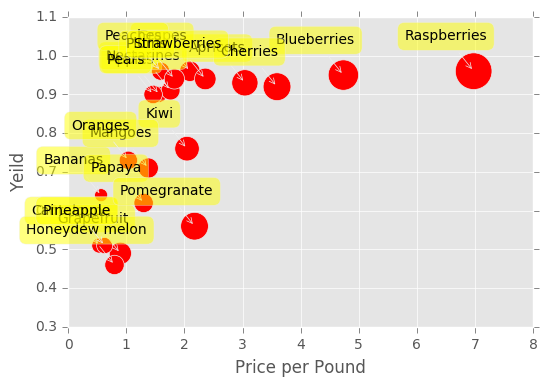

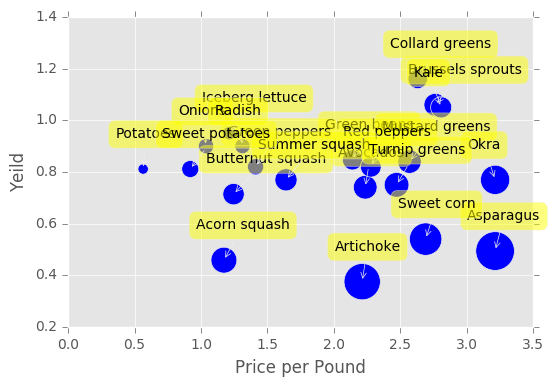

In [77]:
#Plot without point labels
plt.scatter(fruit.iloc[:,1], fruit.iloc[:,2], s = fruit.iloc[:,4]*300, c = 'r')
plt.scatter(veg.iloc[:,1], veg.iloc[:,2], s = veg.iloc[:,4]*300)
plt.xlabel("Price per Pound")
plt.ylabel("Yeild")

plt.show()

#Plot with fruit labels
plt.scatter(fruit.iloc[:,1], fruit.iloc[:,2], s = fruit.iloc[:,4]*300, c = 'r')
plt.xlabel("Price per Pound")
plt.ylabel("Yeild")

labels = fruit['food']

for label, x, y in zip(labels, fruit.iloc[:,1], fruit.iloc[:,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0',  = 'r'))


plt.show()

#Plot with vegetable labels
plt.scatter(veg.iloc[:,1], veg.iloc[:,2], s = veg.iloc[:,4]*300)
plt.xlabel("Price per Pound")
plt.ylabel("Yeild")

labels = veg['food']

for label, x, y in zip(labels, veg.iloc[:,1], veg.iloc[:,2]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='left', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))


plt.show()

<li> 4. A surprising thing about the data is that fruits have a very linear relationship between price per cup and price per pound, and a consistent clustering of yeilds given the price. However, vegetables have a less tightly linear relationship, and also do not have a very strong correlation between yeild and price. We would expect the larger dots to be in the upper right, like they are with fruit, but instead we see them in the lower right, and some smaller yeilding vegetables in the upper right quadrrant. </li>

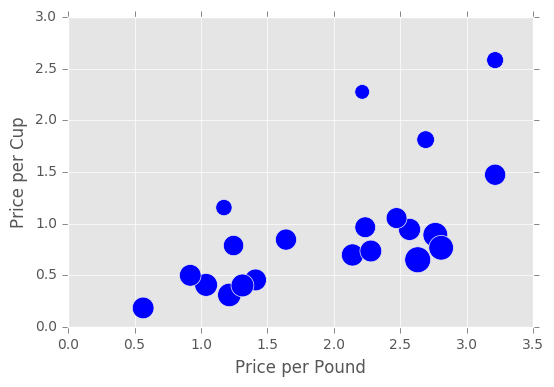

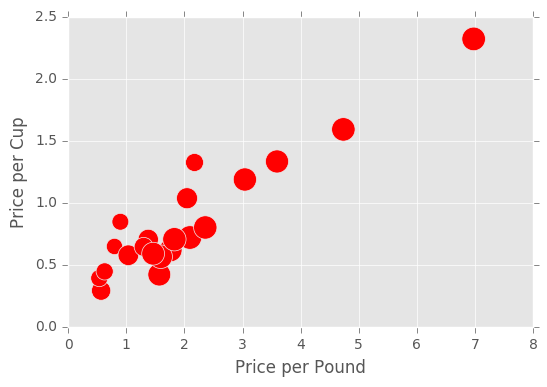

In [93]:
#Plot with vegetable labels
plt.scatter(veg.iloc[:,1], veg.iloc[:,4], s = veg.iloc[:,2]*300)

plt.xlabel("Price per Pound")
plt.ylabel("Price per Cup")

plt.show()

plt.scatter(fruit.iloc[:,1], fruit.iloc[:,4],s = fruit.iloc[:,2]*300, c = 'r')

plt.xlabel("Price per Pound")
plt.ylabel("Price per Cup")

plt.show()

<li> 5. If I had data on produce nutritional value, I may be able to identify the produce with the highest value and highest nutrition. As someone who has been to a grocery store, I could use my limited knowledge of nutrition to guess that of the produce I already identified as high value, oranges, melon, and squash probably also have high nutrition. Potatoes and bananas are mostly carbs, I believe, making them not very nutritious although they have a high yeild and low price. Perhaps some of the higher price but lower yeild produce, like kale or berries, would raise their value because of their higher nutrition. 